# Import des modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

J'ouvre le fichier qui a comme séparateur une tabulation.

In [2]:
df = pd.read_csv('Titanic.txt', sep='\t')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 14 columns):
Name           622 non-null object
Survived       622 non-null object
Boarded        622 non-null object
Class          622 non-null object
MWC            622 non-null object
Age            622 non-null float64
Adult/Child    622 non-null object
Sex            622 non-null object
Paid           375 non-null float64
Ticket#        361 non-null object
Boat [Body]    248 non-null object
Job            430 non-null object
Class.Dept     606 non-null object
Class.Full     621 non-null object
dtypes: float64(2), object(12)
memory usage: 68.1+ KB


In [3]:
df.head(3)

,Name,Survived,Boarded,Class,MWC,Age,Adult/Child,Sex,Paid,Ticket#,Boat [Body],Job,Class.Dept,Class.Full
0,"ABBING, Mr Anthony",Dead,Southampton,3,Man,42.0,Adult,Male,7.55,5547,NaN,Blacksmith,3rd Class Passenger,3
1,"ABBOTT, Mr Ernest Owen",Dead,Southampton,Crew,Man,21.0,Adult,Male,NaN,NaN,NaN,Lounge Pantry Steward,Victualling Crew,V
2,"ABBOTT, Mr Eugene Joseph",Dead,Southampton,3,Child,14.0,Child,Male,20.25,CA2673,NaN,Scholar,3rd Class Passenger,3


# Chances de survie

Voici une première manière (compliquée), d'afficher les chances de survie des passagers du Titanic en fonction de leur genre.

On crée un nouveau DataFrame qui va contenir les indicateurs à tracer.

In [5]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

df2 = pd.DataFrame(columns = ['MWC', 'Chances'])

i = 0
for elem in ['Man', 'Woman', 'Child']:
    nb_sur = sum(np.logical_and(df['Survived'] == 'Alive', df['MWC'] == elem))
    pourc_sur = nb_sur / sum(df['MWC'] == elem)
    #print(elem, pourc_sur, sep=':')
    
    df2.loc[i] = [elem, pourc_sur]
    
    i += 1

df2

,MWC,Chances
0,Man,0.175824
1,Woman,0.781955
2,Child,0.617647


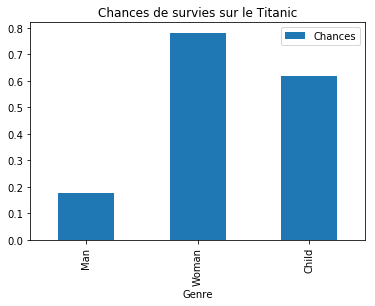

In [6]:
df2.plot(kind = 'bar', x = 'MWC')
plt.title('Chances de survies sur le Titanic')
plt.xlabel('Genre')
plt.show()

# Aberrations

Au passage, nous n'avons pas analysé les aberrations. Pour ce faire, la fonction describe() est bien pratique.

In [7]:
df.describe()

,Age,Paid
count,622.000000,375.000000
mean,29.949743,36.175089
std,11.818129,58.046663
min,0.080000,0.000000
25%,22.000000,7.910417
50%,29.000000,15.900000
75%,37.000000,31.387500
max,71.000000,512.329167


Beaucoup de gens n'ont pas payé leur billet ? Est-ce normal ? Regardons de plus près.

In [8]:
df[df['Paid'] == 0.0]

,Name,Survived,Boarded,Class,MWC,Age,Adult/Child,Sex,Paid,Ticket#,Boat [Body],Job,Class.Dept,Class.Full
62,"ANDREWS, Mr Thomas",Dead,Belfast,1,Man,39.0,Adult,Male,0.0,112050,NaN,Shipbuilder,1st Class PassengerH&W Guarantee Group,1
248,"BRAILEY, Mr William Theodore Ronald",Dead,Southampton,2,Man,24.0,Adult,Male,0.0,250654,NaN,Musician,2nd Class PassengerMusician,2
258,"BRICOUX, Mr Roger Marie",Dead,Southampton,2,Man,20.0,Adult,Male,0.0,250654,NaN,Musician,2nd Class PassengerMusician,2
324,"CAMPBELL, Mr William Henry",Dead,Belfast,2,Man,21.0,Adult,Male,0.0,239853,NaN,NaN,2nd Class PassengerH&W Guarantee Group,2
384,"CHISHOLM, Mr Roderick Robert Crispin",Dead,Belfast,1,Man,43.0,Adult,Male,0.0,112051,NaN,Draughtsman,1st Class PassengerH&W Guarantee Group,1
399,"CLARKE, Mr John Frederick Preston",Dead,Southampton,2,Man,28.0,Adult,Male,0.0,250654,[202],Musician,2nd Class PassengerMusician,2
486,"CUNNINGHAM, Mr Alfred Fleming",Dead,Belfast,2,Man,21.0,Adult,Male,0.0,239853,NaN,Fitter,2nd Class PassengerH&W Guarantee Group,2


Ils étaient tous plus ou moins employés sur le bâteau. Cela parait plutôt logique. Continuons.

# Plus d'analyses

D'où sont partis les passagers ? Très facile à lire !

In [11]:
df['Boarded'].value_counts()

Southampton    464
Cherbourg       77
Belfast         53
Queenstown      28
Name: Boarded, dtype: int64

Et quel âge avaient les passagers ?

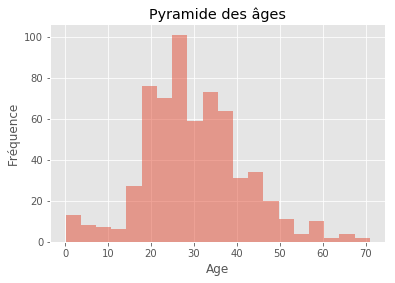

In [13]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df['Age'].plot(kind='hist', bins = 20, alpha = 0.5)

plt.title('Pyramide des âges')
plt.xlabel('Age')
plt.ylabel('Fréquence')

plt.show()
plt.savefig('titanic.png')

Revenons sur les chances de survie. Maintenant que l'on connait les groupby(), nous pouvons aller beaucoup plus vite.

Mais pour faire ce que nous voulons faire, ce serait pratique de transformer 'Alive' en True et 'Dead' en False. Comme Python est capable de sommer des True et False (alors équivalents à 1 et 0, respectivement), nous pourrons agréger nos mesures.

In [14]:
df['Survived'] = df['Survived'].apply(lambda x: True if x == 'Alive' else False)

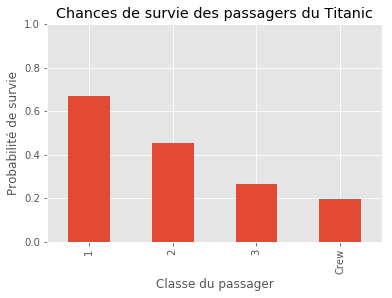

In [15]:
ax = df.groupby('Class')['Survived'].mean().plot(kind='bar')

plt.title("Chances de survie des passagers du Titanic")
plt.ylabel("Probabilité de survie")
plt.xlabel("Classe du passager")

ax.set_ylim([0, 1])

plt.show()